In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's imagine that in our sample there are a lot of objects of the zero class and nothing of the first class, moreover, this happens very often, an example is the task of predicting fraudulent transactions, or it is also called fraud detection: there are a lot of ordinary transactions and very few transactions with malicious intent.

Let us generate such a sample where there is a class imbalance, class 0 objects are 9 times more than class 1 objects (`weights=(0.9, 0.1)`).  
For ease of understanding, we will assume that class 0 is normal transactions in the bank, and class 1 is suspicious fraudulent transactions.

In [2]:
from sklearn import datasets


X_disbalance, y_disbalance = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=2,
    weights=(0.9, 0.1)
)

X_disbalance, y_disbalance

(array([[ 0.66930255, -0.35556485],
        [ 0.96417816, -0.37583852],
        [-1.1177634 , -0.85116212],
        [-0.26257856, -1.50684503],
        [ 1.27004352, -2.01184296],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 0.7545933 ,  1.11410377],
        [ 0.37973272,  0.79063286],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-0.66010918, -1.0843706 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.85711456, -1.16420714],
        [-1.33222706, -0.85982898]]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

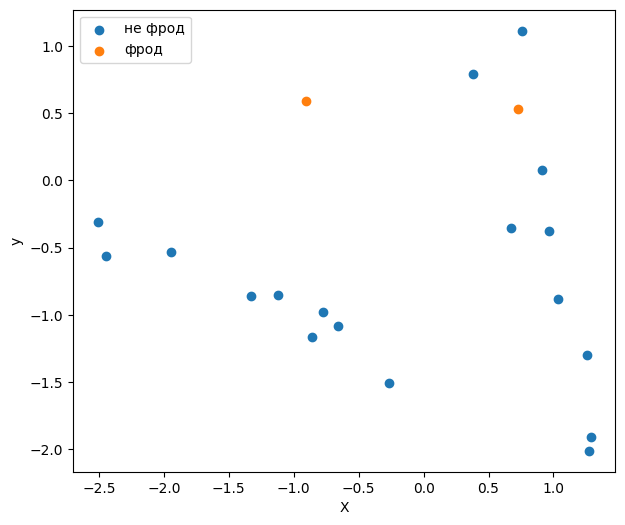

In [3]:
plt.figure(figsize=(7, 6))

class_0 = X_disbalance[y_disbalance == 0]
class_1 = X_disbalance[y_disbalance == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='no fraud')
plt.scatter(class_1[:, 0], class_1[:, 1], label='fraud')

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

If we take a constant model (a(x) = 0), which will always respond 0 class to any object it sees, we get a decent accuracy metric:

In [4]:
pred = [0 for i in range(20)]
pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
pred_df_disbalance = pd.DataFrame({
    'ground truth': y_disbalance,
    'prediction': pred
})

pred_df_disbalance

,ground truth,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [6]:
pred_df_disbalance['right'] = pred_df_disbalance['ground truth'] == pred_df_disbalance['prediction']
pred_df_disbalance

,ground truth,prediction,right
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,1,0,False
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


Then we can calculate the proportion of correct answers (the number of True values divided by the number of objects):


In [7]:
pred_df_disbalance['right'].sum() / pred_df_disbalance.shape[0]

0.9

We get a very high proportion of correct answers, which tends to 1, but in fact, the model is useless, the algorithm always answers with zero class, the model will never answer with the first class. So, although the accuracy metric is high, we cannot speak about a quality model here.

Let's find the objects on which the model made a mistake:

In [8]:
wrong_objects_0_class = X_disbalance[~(pred_df_disbalance['right']) & (pred_df_disbalance['ground truth'] == 0)]
wrong_objects_1_class = X_disbalance[~(pred_df_disbalance['right']) & (pred_df_disbalance['ground truth'] == 1)]

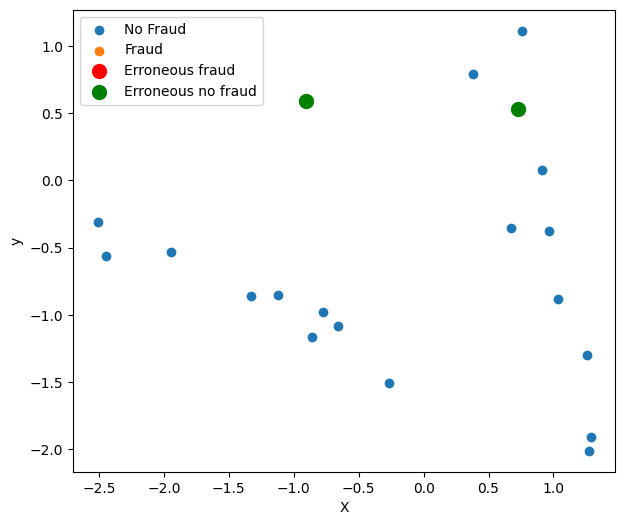

In [9]:
plt.figure(figsize=(7, 6))


class_0 = X_disbalance[y_disbalance == 0]
class_1 = X_disbalance[y_disbalance == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='No Fraud')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Fraud')

plt.scatter(wrong_objects_0_class[:, 0], wrong_objects_0_class[:, 1], c='r', label='Erroneous fraud', s=100)
plt.scatter(wrong_objects_1_class[:, 0], wrong_objects_1_class[:, 1], c='g', label='Erroneous no fraud', s=100)

plt.legend()
plt.xlabel('X')
plt.ylabel('y');